In [2]:
import sys
from numpy import array, loadtxt, argsort, zeros, dot
from numpy.linalg import eig
import pandas as pd
from matplotlib import pyplot as plt

def covariance_matrix(X, bias=False):
	n = X.shape[0]
	k = X.shape[1]
	C  = zeros([k,k])

	for i in range(k):
		for j in range(k):
			avg_i = X.sum(axis=0)[i]/n
			avg_j = X.sum(axis=0)[j]/n
			C[i,j] = sum((X[:,i] - avg_i)*(X[:,j] - avg_j))/(n if bias else n-1)
	return C

def pca(X):
	w,v = eig(covariance_matrix(X))
	sorted = v[:,argsort(w)[::-1][:2]]
	v1 = sorted[:,0]
	v2 = sorted[:,1]
	v1 = dot(v1, X.T)
	v2 = dot(v2, X.T)
	return v1, v2

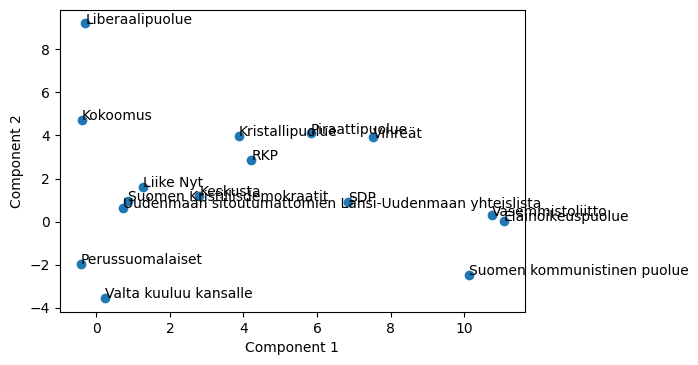

In [6]:
# Data preparation
X = loadtxt('elec2022.txt', usecols=([i for i in range(1,56)]))
parties = loadtxt('elec2022.txt', usecols=(0))
parties_names = pd.read_csv('parties.txt', sep=',', header=None) # changed the file using commas for convenience

# Apply PCA using TMC code
x1, x2 = pca(X)

# Prepare output
df = pd.DataFrame()
df['party'] = parties
df['party'] = df['party'].map(parties_names.set_index(0)[1])
df['x1'] = x1
df['x2'] = x2
df = df.groupby(['party']).mean().reset_index()

# Plot the results
fig, ax = plt.subplots()
ax.scatter(df['x1'], df['x2'])
for i, txt in enumerate(df['party']):
    ax.annotate(txt, (df['x1'][i], df['x2'][i]))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
fig.set_dpi(100)

# plt.scatter(df['x1'], df['x2'], c=df['party'])